In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants

In [4]:
N = 100000
Tmax = 10.
T = np.linspace(0.,Tmax,N)
dt = Tmax/N

dW = np.random.normal(0., np.sqrt(dt), size=T.shape)
theta = 100000.
sigma = 10.
U = np.exp(-T*theta)*(np.random.normal(0., sigma)+np.cumsum(np.exp(T*theta)*dW))

C:\Users\Evgeniy\AppData\Local\Temp\ipykernel_24432\4176636890.py:9: RuntimeWarning: overflow encountered in exp
  U = np.exp(-T*theta)*(np.random.normal(0., sigma)+np.cumsum(np.exp(T*theta)*dW))
C:\Users\Evgeniy\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


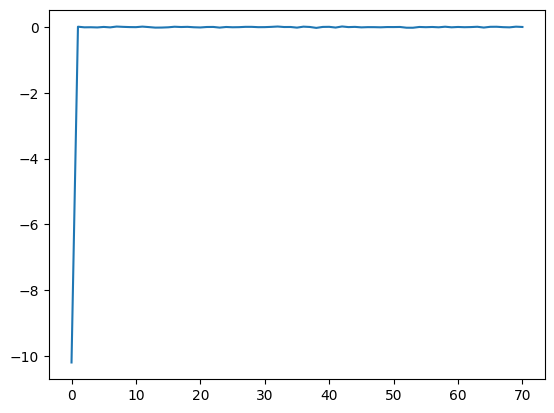

In [5]:
plt.plot(U)

In [9]:
dt

0.0001

In [10]:
U = np.zeros(T.shape)
U[0] = np.random.normal(0., sigma/np.sqrt(2*theta));
for i in range(np.size(T)-1):
    U[i+1] = (U[i]*(1-theta*dt) + sigma*dW[i])

C:\Users\Evgeniy\AppData\Local\Temp\ipykernel_24432\425526469.py:4: RuntimeWarning: overflow encountered in double_scalars
  U[i+1] = (U[i]*(1-theta*dt) + sigma*dW[i])


In [11]:
np.size(T)

100000

In [12]:
plt.figure(figsize=(16,9), dpi=120)
plt.plot(T, U)

C:\Users\Evgeniy\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\ticker.py:2101: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
C:\Users\Evgeniy\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\ticker.py:2133: RuntimeWarning: overflow encountered in double_scalars
  high = edge.ge(_vmax - best_vmin)
C:\Users\Evgeniy\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\ticker.py:1956: RuntimeWarning: invalid value encountered in double_scalars
  d, m = divmod(x, self.step)


Error in callback <function _draw_all_if_interactive at 0x0000016D32397C70> (for post_execute):


ValueError: arange: cannot compute length

ValueError: arange: cannot compute length

<Figure size 1920x1080 with 1 Axes>

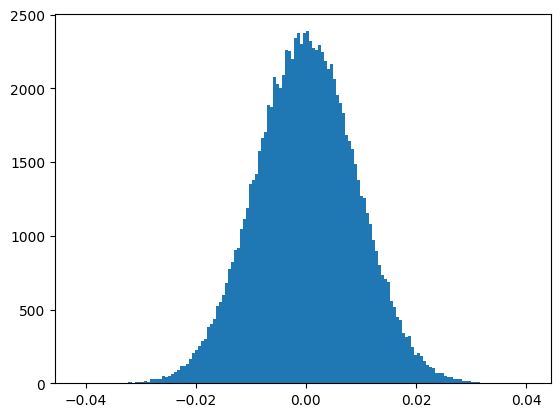

In [9]:
plt.hist(U, bins=150)
plt.show()

In [26]:
# All length values should be the same units, for example, nm 

L = 10e7  # length of fiber
lam = 1550  # laser wavelength
N = 100000  # Integrating steps
M = 1  # Number of simulations


corrLtheta = 5e6  # Correlation length for theta
corrLdn = 1e1 # Correlation length for Delta_n

dn_mean = 0.
dn_sigma = 0.1

theta_sigma = 2*np.pi  # distribution fo trig functions become almost uniform

In [27]:
Matricies = []
dl = L/N;
Ls = np.linspace(0., L, N)

def A(theta, delta_n, lam):
    return 1j*2*np.pi/lam*delta_n*np.array([[np.sin(theta)**2, -np.sin(theta)*np.cos(theta)],
                            [-np.sin(theta)*np.cos(theta), np.cos(theta)**2]])

def B(gam, bma, theta, delta_n, lam):
    return 2*np.pi/lam*delta_n*np.array([-(1+gam**2)*np.sin(bma)*np.sin(theta)*np.cos(theta), 
                                            np.cos(theta)**2-np.sin(theta)**2 - np.cos(bma)*np.sin(theta)*np.cos(theta)*(1/gam-gam)])

for m in range(M):
    print("Reached step {}".format(m))
    
    # We must be aware of decorrelation, so solution of Ornstein-Uhlenbeck process in case of
    # large step in comparison to correlation length MUST be replaced with independent distribution
    
    # We need RK4, so instead of interpolating theta and dn functions we will simply generate two times more values
    theta = np.zeros(2*N)
    dn = np.zeros(2*N)
    if corrLtheta < dl:
        theta = np.random.normal(0., theta_sigma, 2*N)
    else:
        dWt = np.random.normal(0., np.sqrt(dl/2), size=2*N)  # Driving Wiener process for theta
        theta[0] = np.random.normal(0., theta_sigma)
        for k in range(2*N-1):
            theta[k+1] = (theta[k] + theta_sigma*np.sqrt(2/corrLtheta)*dWt[k])/(1+dl/2/corrLtheta)
            
    if corrLdn < dl:
        dn = np.random.normal(dn_mean, dn_sigma, 2*N)
    else:
        dWn = np.random.normal(0., np.sqrt(dl/2), size=2*N)  # Driving Wiener process for Delta_n
        dn[0] = np.random.normal(0., dn_sigma)
        for k in range(2*N-1):
            dn[k+1] = (dn[k] + dn_sigma*np.sqrt(2/corrLdn)*dWn[k])/(1+dl/2/corrLdn)
      
    # Start solution for Jones matrix
      
    V = np.array([1., 0.])
    VV = [V]
    
    for k in range(N-1):
     #   k1 = A(theta[2*k], dn[2*k], lam) @ V
     #   k2 = A(theta[2*k+1], dn[2*k+1], lam) @ (V + dl/2*k1)
     #   k3 = A(theta[2*k+1], dn[2*k+1], lam) @ (V + dl/2*k2)
     #   k4 = A(theta[2*k+2], dn[2*k+2], lam) @ (V + dl*k3)
     #   V = V + dl/6*(k1 + 2*k2 + 2*k3 + k4)
        # V = V / np.sqrt(np.conjugate(V) @ V)
        # V = V + dl * A(theta[2*k], dn[2*k], lam) @ V
        V = np.linalg.solve(np.eye(2)-dl/2*A(theta[2*k], dn[2*k], lam), (np.eye(2)+dl/2*A(theta[2*k], dn[2*k], lam))@V)
        
        print(V)
        VV.append(V)
        
    
    Matricies.append(V);

Reached step 0
[0.99685168-0.01203178j 0.01983912+0.07581809j]
[0.90678979-0.16391242j 0.17921807+0.34459524j]
[0.82831983-0.23372008j 0.27416607+0.42906193j]
[0.63198767-0.38675789j 0.40802921+0.53340612j]
[0.70993085-0.35916469j 0.33223686+0.50657436j]
[0.53300251-0.3458547j  0.59971389+0.48645257j]
[0.46112886-0.31731263j 0.69731017+0.44769566j]
[0.41680524-0.29059216j 0.75628596+0.41214214j]
[0.49687384-0.31389039j 0.68318562+0.43341276j]
[0.43946196-0.30359845j 0.73088548+0.42486184j]
[0.58095838-0.36178913j 0.5191472 +0.51193962j]
[0.63783269-0.35445959j 0.46151405+0.50451229j]
[0.73906115-0.29212207j 0.39319469+0.46244053j]
[0.66358272-0.30056629j 0.49479735+0.47380742j]
[0.65591972-0.29827718j 0.51066104+0.46906859j]
[0.76579697-0.28366428j 0.36220995+0.44932563j]
[0.90624985-0.22646152j 0.10020147+0.34261649j]
[ 0.98315708-0.08913094j -0.00232521+0.15953815j]
[0.95988567+0.17996352j 0.02988607-0.21293065j]
[0.97901524+0.12875321j 0.00925104-0.15769019j]
[0.98073741+0.12246753j

[0.05605724+0.24568709j 0.01687756-0.96757976j]
[-0.059773  +0.22510208j  0.34490483-0.90928373j]
[-0.22131049+0.09434964j  0.81277967-0.53057424j]
[-0.16863627+0.16155424j  0.69828128-0.67665744j]
[-0.26029123+0.02953484j  0.84731166-0.46199473j]
[-0.24254709+0.06444082j  0.82363744-0.50856627j]
[-0.05741707+0.26716216j  0.60539759-0.74754359j]
[0.07315802+0.33156109j 0.35511816-0.87098005j]
[-0.05709394+0.26346813j  0.63296415-0.72572806j]
[-0.15439854+0.13586904j  0.90795966-0.36511635j]
[-0.12553568+0.18821932j  0.81589576-0.53209811j]
[-0.11234482+0.20586023j  0.77293267-0.58955516j]
[-0.0917479 +0.22881985j  0.73071169-0.63661938j]
[-0.14915545+0.15154668j  0.86248197-0.4592506j ]
[-0.11970796+0.19653843j  0.81614417-0.53004844j]
[0.24808689+0.41210034j 0.34630006-0.80542068j]
[0.08619401+0.35421924j 0.5945522 -0.7166638j ]
[-0.12968938+0.12802481j  0.89945975-0.39719323j]
[0.14161687+0.38919667j 0.64661497-0.64059324j]
[ 0.67540867+0.38143575j -0.01246072-0.63101079j]
[0.5618639

[-0.43333625+0.81821745j  0.23083685+0.29908901j]
[-0.26595571+0.81083988j  0.43313536+0.29017237j]
[-0.51039396+0.80994009j  0.01373422+0.28862853j]
[-0.5399982+0.7972559j  -0.0358138+0.26739925j]
[-0.56364692+0.78418166j -0.06498057+0.25127435j]
[-0.24111092+0.87137456j  0.25994886+0.33911428j]
[-0.51167615+0.81176064j -0.00164376+0.28147731j]
[0.17273935+0.8260081j  0.45083362+0.29089652j]
[0.04123049+0.8847956j  0.28889166+0.36328832j]
[-0.3257714 +0.87573045j  0.00541242+0.35628623j]
[-0.03421798+0.91113581j  0.16573622+0.37575546j]
[0.21339708+0.85468649j 0.3312237 +0.33802894j]
[-0.17082236+0.89899791j  0.1932583 +0.35394027j]
[-0.59733146+0.74862527j  0.00516753+0.28762585j]
[-0.22337464+0.87795438j  0.2198715 +0.361879j  ]
[-0.44028748+0.82625389j  0.10644582+0.33484435j]
[-0.27034786+0.88620042j  0.14335638+0.34786462j]
[-0.64605032+0.6905613j   0.08040738+0.31508526j]
[0.36431054+0.83856577j 0.22570163+0.33636894j]
[-0.28110057+0.89181108j  0.05115341+0.35076887j]
[-0.451299

[-0.35415189-0.65390483j -0.03562371+0.66761955j]
[-0.33230673-0.70449378j -0.01801708+0.62684618j]
[-0.34913762-0.68145614j -0.02947917+0.64253516j]
[-0.35108527-0.60421208j -0.03129684+0.71462396j]
[-0.31648231-0.67968328j -0.00702239+0.66167989j]
[-0.26888963-0.72619343j  0.02303521+0.63230597j]
[-0.27904135-0.70372793j  0.01357689+0.65323701j]
[-0.22776417-0.75534213j  0.05448886+0.61205614j]
[-0.23707184-0.73005724j  0.04442102+0.63940608j]
[-0.25919342-0.70168391j  0.02589713+0.66316499j]
[-0.32296991-0.64457813j -0.00734765+0.69293252j]
[-0.36362727-0.60145542j -0.02432509+0.71093944j]
[-0.32137479-0.6595769j  -0.00144513+0.67946631j]
[-0.42012707-0.4491914j  -0.05182045+0.78678775j]
[-0.42131461-0.35086303j -0.05239852+0.83465174j]
[-0.31847637-0.22729948j  0.01870568+0.92008578j]
[-0.26808761-0.17948511j  0.04542177+0.94543693j]
[-0.30514298-0.3273468j   0.03245311+0.89368822j]
[-0.24085189-0.23606289j  0.06450944+0.9392035j ]
[-0.33939056-0.30775398j -0.00468138+0.88886423j]


[-0.6416887 -0.75994375j -0.03972237-0.09562032j]
[-0.59576588-0.79569467j -0.02638405-0.1060042j ]
[-0.67663368-0.72908113j -0.03970322-0.09503276j]
[-0.8806851 -0.46465788j -0.08420811-0.03736039j]
[-0.9490829 -0.29993512j -0.09589367-0.00921799j]
[-0.79366467+0.53562848j -0.04107455+0.28550202j]
[-0.67663115+0.65777738j  0.00242012+0.33089779j]
[-0.70747285+0.62962449j -0.00852276+0.32090892j]
[-0.65658308+0.67663169j  0.00482046+0.33323413j]
[-0.50565312+0.77964244j  0.05237491+0.36569038j]
[-0.5843013 +0.72810152j  0.03816176+0.35637599j]
[-0.88401996+0.39284107j -0.06049723+0.24601765j]
[-0.98567065+0.09772702j -0.12761849+0.05115004j]
[-0.79175582+0.54324138j -0.02896702+0.27779926j]
[-0.72257291+0.60935086j  0.02123833+0.32577425j]
[-0.75578196+0.57813832j  0.00177838+0.30748422j]
[-0.87154685+0.44092447j -0.09573671+0.1919015j ]
[-0.41567356+0.77442138j  0.22024453+0.42305952j]
[-0.13317903+0.7831115j   0.42957013+0.42949881j]
[-0.12354028+0.78148495j  0.43652848+0.42832459j]


[ 0.6890727 -0.1610975j  -0.47845115-0.51991433j]
[ 0.76362685-0.17770269j -0.23701997-0.57368748j]
[ 0.7733221 -0.17956107j -0.11688426-0.59671502j]
[ 0.76762353-0.1783823j  -0.21731843-0.57593972j]
[ 0.76101424-0.1746097j -0.42661831-0.4564708j]
[ 0.73674412-0.13890164j -0.64899847-0.12928811j]
[ 0.73712268-0.14037253j -0.64466512-0.14612524j]
[ 0.74265897-0.15299767j -0.61901826-0.20461123j]
[ 0.79916545-0.19840438j -0.45970205-0.33263241j]
[ 0.75819875-0.17814295j -0.55963745-0.28320607j]
[ 0.73028049-0.15990884j -0.61704584-0.24571122j]
[ 0.67155036-0.05757767j -0.7378808 -0.03516878j]
[ 0.66945794-0.02984138j -0.74199694+0.01939313j]
[ 0.67354512-0.06805337j -0.73371435-0.05804281j]
[ 0.67266334-0.00208103j -0.73556476+0.08040012j]
[ 0.70000489+0.06071721j -0.6815303 +0.20450677j]
[ 0.70664391+0.07468391j -0.64390364+0.2836632j ]
[ 0.69061516+0.03867415j -0.7089874 +0.13744771j]
[ 0.68363314+0.01658781j -0.72411602+0.08959109j]
[ 0.6869028 +0.0258618j -0.71864164+0.1051185j]
[ 0.

[-0.24675743-0.88137794j -0.27833074-0.29123134j]
[-0.27360696-0.88811803j -0.23916505-0.28139951j]
[-0.30140665-0.88656829j -0.20727086-0.2831775j ]
[-0.37856951-0.86124991j -0.16095404-0.2983748j ]
[-0.69310414-0.55286852j  0.00644085-0.46249494j]
[-0.61025366-0.69826729j -0.04545978-0.37141173j]
[-0.60798893-0.70138268j -0.04718938-0.36903246j]
[-0.62678021-0.67227388j -0.03194299-0.39265004j]
[-0.50032774-0.80743609j -0.13593141-0.28149913j]
[-0.43707579-0.84340832j -0.17042978-0.26187945j]
[-0.03072408-0.86546253j -0.4344533 -0.24754992j]
[ 0.00455259-0.84696096j -0.46245839-0.26223776j]
[ 0.01756358-0.83825388j -0.47359253-0.26968883j]
[ 0.02079471-0.83704656j -0.47524269-0.27030541j]
[-0.3600703 -0.83524548j -0.31502249-0.27106308j]
[-0.155944 -0.89044393j -0.3349817-0.26566585j]
[ 0.17845666-0.84852845j -0.41491051-0.27568453j]
[ 0.12851816-0.85545207j -0.41879106-0.27622254j]
[ 0.35318639-0.77433831j -0.44135463-0.28436885j]
[-0.40738024-0.69441322j -0.52526493-0.27555103j]
[-

[ 0.80459972+0.28307287j -0.14712875-0.50084147j]
[ 0.78311515+0.24488135j -0.1720424 -0.54512862j]
[ 0.83172283+0.33802768j -0.11010573-0.4264401j ]
[ 0.78513466+0.26323033j -0.1760121 -0.53225285j]
[ 0.79854426+0.2711592j -0.14905792-0.5163153j]
[ 0.76266803+0.25676519j -0.22815002-0.54804807j]
[ 0.62023592+0.21700783j -0.44485607-0.60853767j]
[ 0.6370849 +0.22056011j -0.42464731-0.60427703j]
[ 0.60491336+0.23526537j -0.50821885-0.56607741j]
[ 0.64440977+0.2214089j -0.42670243-0.5946757j]
[ 0.72586547+0.20816428j -0.09219417-0.6490664j ]
[0.77942518+0.22840203j 0.10868411-0.57316374j]
[ 0.71422083+0.18805809j -0.0514116 -0.67221991j]
[ 0.67948397+0.16412762j -0.102857  -0.70766101j]
[ 0.6135669 +0.10464706j -0.16620838-0.7648264j ]
[ 0.32380962+0.0889548j  -0.52195185-0.78409224j]
[ 0.50184773+0.0621345j  -0.25416185-0.82443309j]
[ 0.43040598+0.07000832j -0.39416137-0.8090033j ]
[ 0.3648771 +0.10518648j -0.61674143-0.6895147j ]
[ 0.32909442+0.14192093j -0.75927875-0.54318606j]
[ 0.32

[0.1451684 -0.01603187j 0.11697609+0.98233686j]
[0.14939878-0.01669083j 0.15285324+0.97674833j]
[0.14166065-0.0160093j  0.00496822+0.98977335j]
[0.14770297-0.01635682j 0.08721932+0.98504268j]
[0.19707389-0.02983445j 0.36661533+0.90877114j]
[0.20911615-0.03743278j 0.64873413+0.7307621j ]
[0.2104261 -0.03898271j 0.82709665+0.51972332j]
[0.21849228-0.10394229j 0.92715493-0.28607843j]
[0.23167934-0.04326049j 0.96576344-0.10841676j]
[0.22629807-0.07644052j 0.95373702-0.1825698j ]
[0.23511633+0.01019812j 0.97190522-0.00406875j]
[0.2252137 -0.08553587j 0.95370372-0.1800323j ]
[0.20160983+0.19226293j 0.913114  +0.29767645j]
[0.08659526+0.36678362j 0.76933565+0.5158427j ]
[0.11716528+0.33293071j 0.80589169+0.47536094j]
[-0.24757538+0.51556984j  0.14162754+0.80798256j]
[0.18170496+0.32406678j 0.76115324+0.53161055j]
[-0.17426412+0.5109958j   0.23348821+0.80870178j]
[-0.35572495+0.49817212j -0.08426951+0.78624611j]
[-0.35773862+0.49760405j -0.08747633+0.78534144j]
[-0.17256119+0.51441075j  0.2128

[-0.13583003+0.74580726j -0.6294691 -0.17055902j]
[-0.13255033+0.72569877j -0.61015737-0.28896314j]
[-0.13043319+0.78912749j -0.600083  +0.01286033j]
[-0.12360982+0.80412571j -0.57827988+0.06078505j]
[-0.08841488+0.84606448j -0.50407943+0.14920332j]
[-0.12514229+0.79051614j -0.59949961+0.00488514j]
[-0.12181754+0.79501166j -0.5941118 +0.01217022j]
[-0.13822769+0.75519226j -0.63486749-0.0867239j ]
[-0.13445437+0.76233899j -0.62861319-0.07487815j]
[-0.10662681+0.82456533j -0.54350441+0.115437j  ]
[-0.11214359+0.79486371j -0.58573601-0.11193217j]
[-0.11169086+0.80236699j -0.58282237-0.06364309j]
[-0.10987136+0.77954564j -0.56893747-0.23779622j]
[-0.11277005+0.76751756j -0.57452781-0.26099329j]
[-0.02630423+0.88284107j -0.45715476-0.10444735j]
[-0.07408816+0.83868043j -0.51573053-0.15858154j]
[-0.15578063+0.44281723j -0.61396103-0.63458424j]
[-0.06909596+0.31028795j -0.50358286-0.80333768j]
[-0.08539754+0.32806636j -0.52334256-0.78178788j]
[-0.08236801+0.32511922j -0.51831666-0.78667709j]


[0.53294382+0.53128549j 0.65648954+0.05223124j]
[0.5301509 +0.53189482j 0.65828612+0.05183928j]
[0.73566298+0.38893805j 0.53768402+0.13573161j]
[0.68483183+0.4190977j  0.58648176+0.10677845j]
[0.683429  +0.41991969j 0.58765362+0.10609178j]
[0.79862154+0.15383239j 0.54220724+0.21106998j]
[0.79020706+0.2082514j  0.54654679+0.18300486j]
[0.80831188+0.0735985j  0.54179571+0.21834051j]
[0.76387153-0.20835768j 0.54943983+0.26683936j]
[0.75686815+0.25399828j 0.54975904+0.24576507j]
[0.76830587-0.23656488j 0.55022397+0.22582458j]
[0.7775663+0.167272j   0.5508458+0.25294197j]
[0.80045504-0.10593456j 0.55535992+0.19906019j]
[0.74160057+0.30311805j 0.55008976+0.23568899j]
[0.5946954 +0.54310057j 0.51849241+0.28730605j]
[0.6142332 +0.52000801j 0.52104795+0.28428555j]
[0.53619234+0.6054091j  0.50454351+0.30234657j]
[0.26195113+0.78075184j 0.46152668+0.32985042j]
[0.34947264+0.74623741j 0.46030281+0.33033305j]
[0.62172991+0.54495617j 0.44941036+0.3383859j ]
[0.46303688+0.67887101j 0.47194956+0.31936

[-0.20171527-0.50541161j  0.23423478-0.80560792j]
[-0.42999459-0.44199284j -0.51148808-0.59843707j]
[-0.4779005 -0.3713963j  -0.76254951-0.22846038j]
[-0.43377678-0.44910886j -0.63033888-0.46131533j]
[-0.49601136-0.29109018j -0.81793288+0.01500117j]
[-0.4767474 -0.37492672j -0.78371383-0.13391978j]
[-0.4602787 -0.06734456j -0.75149472+0.46782894j]
[-0.49625169-0.22329064j -0.82745931+0.13851584j]
[-0.44662505-0.02064834j -0.73738366+0.50632504j]
[-0.48076237-0.36210151j -0.76513716+0.22872509j]
[-0.48661485-0.30049352j -0.77022218+0.28225419j]
[-0.47664906-0.35496318j -0.76434917+0.25015428j]
[-0.42456915-0.54372495j -0.7188949 +0.08540692j]
[-0.41426496+0.05654118j -0.71064788+0.56583321j]
[-0.41774751+0.04971348j -0.71341847+0.56040135j]
[-0.46623687-0.07121815j -0.75638077+0.4532541j ]
[-0.47776475-0.40944536j -0.76769014+0.12143803j]
[-0.29640091-0.73170072j -0.56690827-0.23532014j]
[-0.15146292-0.83427973j -0.3860468 -0.36332379j]
[-0.02988045-0.87942724j -0.17490015-0.44172937j]


[-0.67499449-0.38925831j -0.62558724-0.03874286j]
[-0.75256614-0.24065703j -0.60886756-0.07077216j]
[-0.50107742-0.54410508j -0.67292538+0.00652046j]
[-0.50883295-0.54296791j -0.6680129 +0.00580016j]
[-0.33730183-0.57435221j -0.74561856+0.01999933j]
[-0.43694387-0.55085407j -0.71098513+0.01183188j]
[-0.5350665 -0.49347474j -0.68569511-0.00295701j]
[-0.58230964-0.46331666j -0.66786795-0.01433713j]
[-0.66735568-0.37171404j -0.64410438-0.03993275j]
[-0.6591333-0.38330106j -0.6459319-0.0373574j ]
[-0.71015186-0.2916942j  -0.63881553-0.05013526j]
[-0.71136574-0.28931295j -0.63849866-0.05075685j]
[-0.77303497-0.05280605j -0.62127786-0.11680012j]
[-0.72267485+0.23034915j -0.63008856-0.16633922j]
[-0.47900664+0.553246j   -0.65265587-0.19624428j]
[-0.35021967+0.62056495j -0.6707669 -0.20571119j]
[-0.67668548+0.30091419j -0.64679035-0.18223516j]
[-0.71311934+0.14932225j -0.65282228-0.20733246j]
[-0.65651685+0.32000565j -0.6518082 -0.20427454j]
[-0.54089311-0.46460736j -0.63958108-0.28724674j]
[-

[-0.76905867+0.04253068j -0.59402933+0.2320971j ]
[-0.74937804+0.09774559j -0.55010022+0.35534223j]
[-0.77163438+0.02863644j -0.58357633+0.25139411j]
[-0.72299496+0.16017854j -0.51840769+0.42763839j]
[-0.58787194+0.34898155j -0.3774174 +0.62463955j]
[-0.54309218+0.39165621j -0.33989132+0.66040153j]
[-0.73012752+0.13925315j -0.49956091+0.44492838j]
[-0.79019493-0.24311867j -0.55635332+0.08340423j]
[-0.78104428+0.06092353j -0.55016255+0.28910089j]
[-0.62184042-0.61509172j -0.42886923-0.2259377j ]
[-0.55105703-0.69044814j -0.3649591 -0.29397681j]
[-0.44518927-0.77081183j -0.25253461-0.37931768j]
[-0.44137071-0.77309565j -0.24956232-0.38109535j]
[-0.02716175-0.87829658j  0.09321525-0.46815412j]
[-0.1044801 -0.87697859j  0.04075193-0.46725982j]
[0.06174182-0.87221321j 0.14059555-0.46439742j]
[0.30797238-0.79408458j 0.33543336-0.40257564j]
[0.24845313-0.82147046j 0.29011406-0.42342786j]
[-0.15679412-0.87299263j -0.01101167-0.46171227j]
[-0.13133051-0.87636056j  0.00176326-0.46340194j]
[0.099

[-0.15581991+0.80602453j  0.03954492+0.56963217j]
[-0.11519028+0.8135382j   0.03549072+0.56888243j]
[ 0.44723227+0.67477607j -0.03421412+0.58608016j]
[ 0.50139478+0.63113428j -0.03970576+0.59050508j]
[ 0.51644517+0.60952308j -0.04610917+0.59969988j]
[ 0.58531662+0.41455593j -0.07883356+0.69233887j]
[ 0.55882423+0.56329679j -0.0633329 +0.60531078j]
[ 0.55482869+0.39342079j -0.06038667+0.73057419j]
[ 0.55713791+0.39793351j -0.0626405 +0.72616971j]
[0.48442731+0.31899164j 0.01861441+0.81438813j]
[ 0.60640717+0.4087124j  -0.20351418+0.65100422j]
[ 0.60639737+0.40870017j -0.20349621+0.65102665j]
[ 0.61505767+0.41785614j -0.22304636+0.63035755j]
[ 0.62875347+0.44429662j -0.24414243+0.58963045j]
[ 0.63270887+0.52562626j -0.24792818+0.51178915j]
[ 0.63735906+0.38010863j -0.25142928+0.62134867j]
[ 0.60710721+0.20935528j -0.23207912+0.7305686j ]
[ 0.55445571+0.08838752j -0.2006335 +0.80281549j]
[ 0.43561799-0.04704746j -0.12384441+0.89032919j]
[ 0.65750167+0.21847811j -0.33366552+0.63923876j]
[ 

[-0.33974641+0.52182297j  0.6428093 +0.44617191j]
[-0.34953202+0.55563949j  0.67368666+0.33946782j]
[-0.26002831+0.43077467j  0.35094419+0.78971934j]
[-0.26115617+0.4313278j   0.37968469+0.77562447j]
[-0.29877188+0.4402591j   0.11122231+0.83936696j]
[-0.30255611+0.44103516j  0.19369661+0.82245329j]
[-0.27461433+0.42927169j  0.52124499+0.68455565j]
[-0.42355419+0.45619409j -0.01985368+0.78236477j]
[-0.4199416 +0.45654626j  0.00057174+0.78435593j]
[-0.36157728+0.45903004j  0.17741615+0.79188181j]
[-0.29309785+0.45268392j  0.32089936+0.77858494j]
[-0.56847409+0.4036458j -0.22012194+0.6822416j]
[-0.77347866+0.15297299j -0.54521572+0.28472766j]
[-0.7823244 +0.12821056j -0.56717487+0.22325605j]
[-0.77953602+0.13715622j -0.56167548+0.24089917j]
[-0.79666896+0.05580323j -0.59785174+0.06912206j]
[-0.79834733+0.01829802j -0.60168933-0.0166334j ]
[-0.78688221-0.08807833j -0.58431095-0.17787443j]
[-0.79128612+0.08053732j -0.59231586+0.12861551j]
[-0.7205635 +0.28693473j -0.50799578+0.37469586j]
[-

[-0.48332874+0.66892839j -0.19755414-0.52905623j]
[-0.50276055+0.68698575j -0.3168598 -0.41818928j]
[-0.51530931+0.70937104j -0.41939137-0.23528688j]
[-0.51724124+0.71176923j -0.3888894 -0.27315033j]
[-0.51399676+0.70807095j -0.42499663-0.23199294j]
[-0.50787469+0.69682083j -0.49629476-0.10097294j]
[-0.50750503+0.69520121j -0.48190724-0.16401013j]
[-0.50070607+0.65800022j -0.45029177-0.33699624j]
[-0.50570739+0.69309413j -0.46819675-0.21135839j]
[-0.50663298+0.69457548j -0.40956054-0.30520172j]
[-0.50669909+0.69465929j -0.39866525-0.31901493j]
[-0.49679809+0.6898659j  -0.43009725-0.30379771j]
[-0.49679036+0.68985587j -0.43039029-0.30341789j]
[-0.42943809+0.61626267j -0.11279011-0.65044726j]
[-0.33705528+0.59753943j  0.16922632-0.70760358j]
[-0.32069496+0.6017888j   0.25698302-0.68480998j]
[-0.37275481+0.59574865j  0.12872433-0.69969097j]
[-0.40808879+0.64029693j  0.08544266-0.64512242j]
[-0.3972415 +0.60776869j  0.09730573-0.6806967j ]
[-0.39465723+0.62353135j  0.09946882-0.66750302j]


[-0.21813371+0.79743838j  0.32304191+0.46060138j]
[-0.24141212+0.6827996j   0.35014159+0.59405872j]
[-0.24456548+0.72845809j  0.35436687+0.53287959j]
[-0.23209269+0.67352584j  0.33539201+0.61644799j]
[-0.20506048+0.57634864j  0.30368088+0.73044532j]
[-0.18032836+0.54342913j  0.27117482+0.77371227j]
[-0.23187301+0.64178987j  0.33659067+0.64888165j]
[-0.24522099+0.72091755j  0.35451121+0.54264754j]
[-0.20484485+0.64853623j  0.27905633+0.67791365j]
[-0.22052451+0.67905034j  0.30305973+0.63120074j]
[-0.16144753+0.54484937j  0.23359883+0.78899015j]
[-0.14336836+0.53058495j  0.20814335+0.80907445j]
[-0.07267573+0.49988202j  0.09630115+0.85764928j]
[-0.03057076+0.48895716j  0.0466949 +0.87052048j]
[ 0.04085105+0.48879252j -0.03572573+0.87071048j]
[ 0.0686697 +0.49388357j -0.07459999+0.86359617j]
[ 0.07232035+0.49468979j -0.08039999+0.86231527j]
[ 0.24237811+0.62818957j -0.34767516+0.65249729j]
[ 0.28737131+0.71528309j -0.45382323+0.44702607j]
[ 0.28030045+0.68693795j -0.43889416+0.50687259j]


[ 0.60614462-0.58541793j -0.52547393+0.11726759j]
[ 0.56039068-0.65634829j -0.42497659+0.27306428j]
[ 0.59169653-0.61180955j -0.49595538+0.17208297j]
[ 0.59609873-0.60429461j -0.50485738+0.15688646j]
[ 0.61355745-0.56514989j -0.54827808+0.05953162j]
[ 0.47961701-0.7385077j  -0.33634277+0.33383744j]
[ 0.44742074-0.76201043j -0.28675424+0.37003621j]
[ 0.35366359-0.81143885j -0.15970289+0.43701722j]
[ 0.24989645-0.84191605j -0.02084087+0.47780204j]
[-0.12935674-0.80012355j  0.39563185+0.43190807j]
[0.09833993-0.85362517j 0.14031144+0.49190041j]
[-0.08265609-0.81563831j  0.35919332+0.44596219j]
[0.05603634-0.84846249j 0.21628164+0.47978493j]
[0.12655864-0.85382233j 0.13794229+0.48573889j]
[0.20158652-0.85108383j 0.04762852+0.48244245j]
[ 0.29567229-0.83386901j -0.07443933+0.46010777j]
[ 0.26067012-0.84254009j -0.03398161+0.47013035j]
[-0.17471371-0.7481408j   0.53856285+0.34599209j]
[-0.32415684-0.56464162j  0.75472569+0.0805687j ]
[-0.26645114-0.65326914j  0.6821983 +0.19196016j]
[-0.2078

[ 0.12802039+0.36988871j -0.06563695+0.91786977j]
[0.38732601+0.25173646j 0.0023188 +0.88690583j]
[0.42984231+0.22120658j 0.01863567+0.87518909j]
[ 0.20625979+0.37455036j -0.02291066+0.90368359j]
[ 0.16938761+0.39112532j -0.02425953+0.90428994j]
[ 0.11818183+0.40992212j -0.02379329+0.90411879j]
[0.30124902+0.33826246j 0.00846714+0.8914908j ]
[0.27076793+0.35673689j 0.0041702 +0.89409515j]
[ 1.37926678e-01+0.42168598j -1.15150946e-04+0.89619035j]
[ 0.05962073+0.43732136j -0.00571564+0.8973086j ]
[-0.05643722+0.43773319j  0.01258067+0.89724368j]
[-0.1251978 +0.42208328j  0.01479835+0.89774842j]
[0.0110096 +0.43578297j 0.03153496+0.89943178j]
[-0.06466287+0.4335103j   0.00963344+0.89877402j]
[-0.08242482+0.43160216j  0.00500245+0.89827652j]
[0.0678334 +0.43294621j 0.02661212+0.89846981j]
[0.23097025+0.39382005j 0.07718008+0.88634177j]
[0.42462788+0.22974746j 0.09592176+0.87046326j]
[0.21592282+0.41126044j 0.08303236+0.8816733j ]
[0.03086419+0.46409724j 0.08476409+0.88117887j]
[-0.05995184

[-0.27207327-0.79774312j -0.50058742+0.19746968j]
[-0.00911654-0.96886696j -0.24541215+0.03140976j]
[ 0.13886273-0.98810121j -0.0656388 +0.00804294j]
[0.30492892-0.94258612j 0.12246555+0.0595982j ]
[0.41944494-0.84705138j 0.27035304+0.18297302j]
[0.37515616-0.89591868j 0.20843036+0.11464885j]
[0.29878675-0.9481767j  0.10019969+0.04058883j]
[ 0.2566621 -0.96604294j -0.02666281-0.01321712j]
[0.28847751-0.95438658j 0.07333797+0.02342065j]
[0.28884583-0.95304971j 0.07918712+0.04465134j]
[0.29110264-0.9533109j  0.06574576+0.04620694j]
[ 0.32181433-0.94481506j -0.06025966+0.0113498j ]
[ 0.32237595-0.94444339j -0.06335559+0.00930094j]
[0.29743782-0.95309438j 0.03531381+0.04352917j]
[0.26310545-0.95332815j 0.14136045+0.04425127j]
[0.25125049-0.94787858j 0.19497436+0.01960567j]
[0.25241725-0.9489518j  0.18724995+0.02671073j]
[0.25666558-0.95030795j 0.17340249+0.03113112j]
[0.30962242-0.95026308j 0.01316564+0.03099533j]
[0.29786418-0.95314007j 0.03781491+0.0370265j ]
[ 0.34849633-0.93349901j -0.

[-0.72055621-0.12100142j  0.10300254-0.67494288j]
[-0.62794716-0.01798072j  0.01037963-0.777979j  ]
[-0.7783433 -0.1895685j  0.19684309-0.5652418j]
[-0.8038571 -0.25069662j  0.22890059-0.48843576j]
[-0.76373996-0.1579488j  0.18100923-0.599157j ]
[-0.82659307-0.42287338j  0.26031842-0.26487037j]
[-0.75678965-0.63034875j  0.17292683-0.00511803j]
[-0.70765208-0.69254166j  0.13207749+0.04658455j]
[-0.62207194-0.77141707j  0.04620914+0.12572558j]
[-0.86534241-0.38171801j  0.2523286 -0.20446064j]
[-0.75061225-0.64312066j  0.14777623+0.0337528j ]
[-0.86767214-0.28251359j  0.2609845 -0.31498924j]
[-0.85632039-0.19217008j  0.24910242-0.40955346j]
[-0.8433755 -0.14891872j  0.23393382-0.46023466j]
[-0.83857969-0.13791092j  0.22727916-0.47550906j]
[-0.77116098+0.00209637j  0.15946266-0.61634244j]
[-0.69433636+0.09657759j  0.08487547-0.70807199j]
[-0.85643373-0.32109981j  0.230897  -0.33181734j]
[-0.80697863-0.04819691j  0.19007592-0.55707602j]
[-0.74436045+0.06587714j  0.13918819-0.64978025j]
[-0.

[0.23729821+0.71242128j 0.52916108-0.395138j  ]
[0.01480716+0.67014625j 0.64101027-0.37388578j]
[-0.07274501+0.62419281j  0.69758395-0.34419199j]
[0.21170906+0.73895322j 0.46678992-0.43730376j]
[0.18474262+0.7326624j  0.49313082-0.43115886j]
[0.0665935 +0.70236288j 0.57859601-0.40924118j]
[0.25096799+0.71848281j 0.49745598-0.41633528j]
[-0.06344461+0.66882996j  0.62593017-0.39604631j]
[-0.1555645 +0.63368586j  0.65206367-0.38607628j]
[-0.2634228 +0.56552142j  0.69385535-0.35966471j]
[-0.36806943+0.4773234j   0.7248833 -0.33351381j]
[-0.2929419 +0.53939073j  0.70947893-0.34624028j]
[-0.2993852 +0.53501903j  0.71040527-0.34561177j]
[0.11838442+0.64420369j 0.66584861-0.35725671j]
[0.0532289 +0.65684988j 0.66225415-0.35655906j]
[-0.09066869+0.64299841j  0.67222104-0.35559965j]
[-0.21058035+0.61750633j  0.66886704-0.35631268j]
[-0.29992301+0.59753277j  0.65045507-0.36042888j]
[-0.220153  +0.57255837j  0.69532491-0.37447674j]
[-0.18132833+0.54060323j  0.72029291-0.39502697j]
[-0.15078356+0.4

[0.47155365-0.4795774j 0.64280757+0.3666621j]
[0.48211909-0.49058767j 0.59312053+0.41844111j]
[0.48337549-0.49296166j 0.60330004+0.39920671j]
[0.4621542 -0.46787746j 0.40208438+0.63704971j]
[0.51004591-0.5573324j 0.57730776+0.3097572j]
[0.51391289-0.58048429j 0.63144664-0.01437622j]
[0.5286157 -0.61331854j 0.46426182+0.3589802j ]
[0.52400753-0.60812632j 0.51292385+0.30415065j]
[0.52648694-0.61121173j 0.47703705+0.34880851j]
[0.53103248-0.61453657j 0.45540393+0.3646321j ]
[0.37438833-0.4411244j  0.8149403 -0.03339094j]
[0.38560556-0.48623171j 0.74855045+0.23357933j]
[0.34740955-0.40464695j 0.8454968 +0.02650681j]
[0.34522803-0.39778395j 0.84995885+0.0124693j ]
[0.33679875-0.35070745j 0.86885539-0.09306553j]
[0.3293365 -0.31358127j 0.87898757-0.14347513j]
[0.3374287 -0.34696796j 0.86905236-0.10248459j]
[0.33606018-0.34078872j 0.87096455-0.11111866j]
[0.35427535-0.40405467j 0.84321504-0.01473751j]
[0.36136655-0.24178507j 0.82842991-0.35306952j]
[0.3978831 -0.16467911j 0.78335612-0.4482443

[0.45771053+0.76924785j 0.12789744+0.42708437j]
[0.31224144+0.83977176j 0.24600031+0.3698277j ]
[0.25129508+0.83036897j 0.31945964+0.38116099j]
[0.28430536+0.86146713j 0.26327118+0.32822726j]
[0.30897715+0.88563692j 0.20987748+0.27591994j]
[0.29065841+0.88301139j 0.23942054+0.28015419j]
[0.30364682+0.8847823j  0.21912419+0.27738688j]
[0.37655285+0.86526808j 0.14613631+0.296923j  ]
[0.40714907+0.85001165j 0.10575959+0.31705637j]
[0.41898086+0.84075766j 0.08709106+0.33165759j]
[0.43932556+0.82453906j 0.06287377+0.35096336j]
[0.3674503 +0.86779232j 0.14548934+0.30124678j]
[0.40263339+0.85105285j 0.10668771+0.31970788j]
[0.38135642+0.8623568j  0.13775936+0.30320026j]
[0.3820013 +0.86172438j 0.13590661+0.30501721j]
[0.38105686+0.86202751j 0.13842145+0.30421003j]
[0.4400702 +0.79116927j 0.03959446+0.42287312j]
[0.40942754+0.84052719j 0.08887912+0.34348747j]
[0.40188869+0.82667403j 0.10804717+0.37871011j]
[0.42241384+0.83836905j 0.04327812+0.34180534j]
[ 0.43357408+0.84313482j -0.01304643+0.3

[-0.13067914-0.20771984j -0.44540445-0.86104025j]
[-0.26686814-0.08255579j -0.47320666-0.83548872j]
[-0.30919109-0.01908865j -0.484994  -0.81781252j]
[-0.30547083-0.02369829j -0.48302586-0.82025117j]
[-0.21064562-0.1268229j  -0.44585943-0.86067052j]
[ 0.12415012-0.23935314j -0.21144076-0.93946241j]
[ 0.06345365-0.23369229j -0.25901579-0.93502533j]
[-0.22033208-0.08165038j -0.64192349-0.72987754j]
[-0.05415538-0.18599682j -0.3369503 -0.9213777j ]
[0.23292585-0.19260652j 0.19260151-0.93357j   ]
[0.21825708-0.19730465j 0.17225448-0.94008676j]
[0.36435677-0.12630981j 0.45462979-0.80287093j]
[0.34367988-0.1408871j  0.41628257-0.82990589j]
[0.44179269-0.04940726j 0.53924005-0.71526101j]
[0.28092949-0.19578839j 0.38191846-0.85841937j]
[0.5014511 +0.053388j   0.72091037-0.47537855j]
[0.51364567+0.0835706j  0.7427618 -0.42129442j]
[0.49347789+0.03477222j 0.70939928-0.50201905j]
[0.53911471+0.21801976j 0.76663226-0.27220892j]
[0.41315715-0.11589667j 0.62238973-0.65459923j]
[0.4078789 -0.12264925

[0.88155999+0.15841988j 0.42000956+0.14610648j]
[0.44305739+0.74515879j 0.49651311+0.04374081j]
[0.12541893+0.86247852j 0.48806233+0.04686211j]
[0.16574223+0.85731045j 0.48509427+0.04724251j]
[0.30522902+0.81823333j 0.48486232+0.04730749j]
[0.00947599+0.85693513j 0.51349278+0.04356095j]
[-0.11131401+0.84800719j  0.51631119+0.04376927j]
[-0.29064578+0.82952593j  0.47523537+0.03953615j]
[-0.63644478+0.65226479j  0.41163168+0.00693206j]
[-0.77491848+0.50280509j  0.38219267-0.02484254j]
[-0.81642906+0.43871169j  0.37351468-0.03824158j]
[-0.91709821-0.108037j    0.3527286 -0.15113377j]
[-0.69469877-0.59720497j  0.36218558-0.17193442j]
[-0.2669079 -0.88968249j  0.33668302-0.1544985j ]
[-0.00543981-0.92887124j  0.33660434-0.15448671j]
[0.15306184-0.91660522j 0.3354291 -0.15457766j]
[-0.19884627-0.90058804j  0.35390176-0.15541844j]
[0.02644515-0.92565721j 0.34442858-0.15436432j]
[0.11990161-0.91211917j 0.36136594-0.15191079j]
[-0.22414995-0.92955624j  0.24658437-0.15772809j]
[-0.42253682-0.883

[0.57501906-0.16201882j 0.70096514-0.38955212j]
[0.56709897-0.18954463j 0.70145103-0.38786344j]
[0.57617479-0.15273955j 0.7001922 -0.39296835j]
[0.39534563+0.30754312j 0.72906428-0.46645936j]
[0.4815016+0.22949467j 0.7142904-0.45307574j]
[0.43302719+0.25930117j 0.72912531-0.46219761j]
[0.36469821+0.30055817j 0.74454158-0.47150594j]
[0.40296655+0.20298126j 0.74956706-0.48431994j]
[0.40270137+0.1192468j  0.74948018-0.51175313j]
[0.40228225+0.12562196j 0.74940841-0.51066148j]
[0.38125699-0.026767j   0.74430257-0.54766808j]
[0.32070468-0.15520821j 0.72407817-0.59056729j]
[0.27729815-0.21470551j 0.70629443-0.61494346j]
[0.29400809-0.19398411j 0.72028405-0.59759542j]
[0.16933286-0.31522424j 0.59331061-0.72107044j]
[0.24073508-0.25437514j 0.6627428 -0.66190021j]
[0.26236013-0.23209931j 0.68005331-0.64406876j]
[0.38570828-0.04273462j 0.78420979-0.48416721j]
[0.43330868+0.32635291j 0.82954973-0.13260697j]
[0.17523676+0.73844966j 0.61791798+0.20533278j]
[-0.07756344+0.84370383j  0.4557376 +0.272

[-0.95662947+0.02839028j  0.23154876-0.17446841j]
[-0.86284035+0.38553472j  0.21202056-0.24883085j]
[-0.74911366+0.56941329j  0.1945988 -0.27699916j]
[-0.89547501+0.31694846j  0.23726084-0.20340962j]
[-0.56237901+0.75329762j  0.1645535 -0.2986548j ]
[-0.09218181+0.91817083j -0.06622679-0.3795772j ]
[ 0.40110071+0.78063309j -0.38002234-0.29208428j]
[ 0.475246  +0.72463837j -0.42884208-0.25521548j]
[ 0.30022289+0.83533145j -0.33829206-0.31248369j]
[-0.03087353+0.92047597j -0.14059529-0.36332325j]
[ 0.14640824+0.8873412j  -0.27777721-0.33768333j]
[-0.3850184 +0.85228634j  0.17497687-0.307818j  ]
[-0.59274619+0.6801801j   0.41792016-0.10653508j]
[-0.5187844 +0.76278149j  0.32010868-0.21577207j]
[-0.41517605+0.83015083j  0.10123073-0.35809326j]
[-0.68044744+0.52729523j  0.49959716+0.09671458j]
[-0.69193288+0.31488002j  0.51573087+0.39509636j]
[-0.68306073+0.28072761j  0.50120437+0.45101466j]
[-0.70283759+0.42624464j  0.53655602+0.1908991j ]
[-0.66810596+0.2058949j   0.48363852+0.52662653j]


[-0.69423423+0.32389619j -0.43251507+0.47545852j]
[-0.64539324+0.39506453j -0.4085624 +0.51036099j]
[-0.55635774+0.49154801j -0.35550207+0.56785993j]
[-0.15258442+0.71259429j -0.19221198+0.65725332j]
[-0.60256269+0.4442761j -0.34422962+0.5666065j]
[-0.66913381+0.36222627j -0.3733443 +0.53072225j]
[-0.66464343+0.36817452j -0.37087563+0.53399241j]
[-0.69649763+0.32615176j -0.39440479+0.50295222j]
[-0.51665153+0.49736565j -0.23265216+0.65694108j]
[-0.52727887+0.49052772j -0.24459923+0.64925401j]
[-0.47302626+0.52464676j -0.19508719+0.68039174j]
[-0.55759721+0.4621195j  -0.24193735+0.64575323j]
[-0.35467484+0.58573836j -0.12274078+0.71836692j]
[-0.23166123+0.62963008j -0.06601271+0.73860772j]
[0.02087563+0.65729246j 0.05208405+0.7515438j ]
[0.06339894+0.65421175j 0.07587987+0.74981985j]
[-0.19373776+0.63916466j -0.05892283+0.74193148j]
[-0.33724332+0.59547432j -0.15715105+0.71202586j]
[-0.34484504+0.59241529j -0.16331684+0.70954466j]
[-0.30848858+0.60715794j -0.14121491+0.71850705j]
[-0.34

[0.54426508-0.31446773j 0.71108554-0.31502845j]
[0.54563913-0.31105126j 0.7073511 -0.32431385j]
[0.53549921-0.34493878j 0.73269032-0.23963039j]
[0.5824995 -0.25559138j 0.61057947-0.47176275j]
[0.585118  -0.25300295j 0.60427165-0.47799813j]
[0.56725298-0.27551691j 0.66148571-0.40589549j]
[0.53655604-0.39328436j 0.73827192-0.1113086j ]
[0.53691943-0.41229922j 0.7359517 +0.01009796j]
[0.53687872-0.41211333j 0.73609414+0.00944761j]
[0.53345853-0.38681297j 0.74804205-0.07893544j]
[0.60048933-0.50704717j 0.56857564+0.2429763j ]
[0.58345424-0.49252597j 0.61204094+0.20592523j]
[0.62007079-0.51186933j 0.54287528+0.24246326j]
[0.70744486-0.51326686j 0.41992014+0.24442989j]
[0.5661622 -0.52965081j 0.57454094+0.26236061j]
[0.47505587-0.46319981j 0.73374486+0.1462407j ]
[0.4267098 -0.36680491j 0.82581983-0.03734315j]
[0.42131236-0.32055139j 0.83736259-0.13625928j]
[0.48221799-0.16126754j 0.69516863-0.50813303j]
[0.58808598-0.10005298j 0.26191692-0.75864604j]
[0.58666408-0.10040519j 0.27199752-0.756

[0.10031487+0.1077265j  0.24328604+0.95871989j]
[0.1497328 +0.08502617j 0.26497769+0.94875574j]
[0.16877301+0.07343999j 0.27184996+0.94457389j]
[0.11597466+0.10382395j 0.25480776+0.9543812j ]
[0.23869242-0.01969069j 0.27912334+0.92990772j]
[0.26259678-0.10772203j 0.28284319+0.91620883j]
[0.24643843-0.16963706j 0.28166099+0.91167892j]
[0.26178294-0.11642194j 0.28273685+0.91541002j]
[0.26271834-0.1372935j  0.28288073+0.91219957j]
[0.2636787 -0.06661856j 0.28298344+0.9197586j ]
[0.27001918+0.14918569j 0.28264574+0.90826464j]
[0.24448513+0.21834634j 0.28548126+0.90058444j]
[0.24039262+0.2222493j  0.2852505 +0.90080452j]
[0.21701786+0.24077133j 0.28279339+0.90275152j]
[0.4531661 -0.03214865j 0.35812176+0.81569342j]
[0.50214774-0.1688793j  0.3784209 +0.75902902j]
[0.52269124-0.34175832j 0.38807524+0.67778516j]
[0.51721312-0.38360201j 0.38583335+0.66066081j]
[0.46241685-0.5635122j  0.36164338+0.58123895j]
[0.32335205-0.72407824j 0.31162789+0.52349041j]
[0.36813893-0.68479542j 0.3271626 +0.537

[-0.38060165-0.07192033j  0.89646215+0.21523352j]
[-0.13496359-0.46046263j  0.78568871+0.39045134j]
[-0.14730699-0.45081086j  0.79116653+0.38616803j]
[-0.02775817-0.4987415j   0.77149711+0.39405408j]
[-0.23563293-0.40130375j  0.79879565+0.38125835j]
[-0.25444085-0.38589323j  0.80177567+0.37881663j]
[-0.43022262-0.15868298j  0.80707315+0.37196926j]
[-0.44894128+0.08942016j  0.80698509+0.37313647j]
[-0.39167882-0.22597771j  0.80500502+0.38404256j]
[-0.39838584-0.21531211j  0.80345893+0.38650118j]
[-0.17195014-0.44710654j  0.77087702+0.41985416j]
[0.01052698-0.51270665j 0.7431519 +0.42982128j]
[0.41082641-0.4087123j  0.69934496+0.41844061j]
[0.26717267-0.4859756j  0.71447658+0.42657906j]
[0.48338642-0.21794497j 0.72497751+0.4395966j ]
[0.48502151-0.09166254j 0.72549536+0.47959211j]
[0.45262568+0.03774178j 0.71124921+0.53649801j]
[0.43883005+0.0737215j  0.70541859+0.55170457j]
[0.04855454+0.43456382j 0.47863893+0.76138132j]
[0.29285326+0.26709662j 0.6632205 +0.63485033j]
[0.09354686+0.4146

[ 0.33748175-0.82790307j -0.08708934-0.4394292j ]
[-0.09036546-0.84102796j -0.29294733-0.44574422j]
[ 0.15228225-0.85542351j -0.20406946-0.45101707j]
[-0.38602781-0.75497077j -0.30764663-0.43168879j]
[-0.17792088-0.83050332j -0.29946942-0.43465671j]
[-0.41541311-0.73367709j -0.33616009-0.41969783j]
[-0.36085292-0.76317403j -0.32748044-0.42439032j]
[-0.68550149-0.49230002j -0.36482654-0.3932302j ]
[-0.65557654-0.53144674j -0.36464176-0.39347191j]
[-0.36485941-0.76087469j -0.29646186-0.44727808j]
[-0.69451175-0.48087234j -0.38314792-0.37364809j]
[-0.84876921-0.13855888j -0.42272168-0.28582975j]
[-0.84096502+0.29167254j -0.42071536-0.17522432j]
[-0.83537807+0.30985706j -0.41991808-0.17262934j]
[-0.68881488+0.60104503j -0.38948437-0.11216443j]
[ 0.03705325+0.96550781j -0.25392333-0.04409841j]
[-0.52871673+0.78160105j -0.32415883-0.06692886j]
[-0.7856792 +0.48970672j -0.36176406-0.10964619j]
[-0.4793457 +0.80841343j -0.33233908-0.07903271j]
[-0.72892324+0.5804029j  -0.35028194-0.09542505j]


[ 0.20801619-0.44171784j -0.70605884-0.51292839j]
[ 0.25452247-0.47433285j -0.33443226-0.77355137j]
[0.32753416-0.47385306j 0.2756619 -0.76954218j]
[0.32951835-0.47305251j 0.2849323 -0.76580191j]
[0.18640078-0.51370463j 0.0352163 -0.836733j  ]
[0.39123771-0.44086645j 0.3725607 -0.71677636j]
[0.34161659-0.46593294j 0.25965657-0.77381074j]
[0.58007313-0.21873546j 0.73097227-0.28521834j]
[0.60200118+0.06246979j 0.76919893+0.20500028j]
[0.61225918-0.00977935j 0.78514172+0.09271211j]
[0.61301846-0.02173254j 0.78640521+0.0728211j ]
[0.56949408-0.28111619j 0.73361462-0.24178457j]
[0.55729997+0.20741162j 0.71857819+0.36061412j]
[0.29944211+0.48557528j 0.37596681+0.73020547j]
[0.10278129+0.56013135j 0.19704554+0.7980363j ]
[-0.08653132+0.57665231j  0.05057633+0.8108184j ]
[-0.59626247+0.34681882j -0.37750879+0.61779842j]
[-0.59327794+0.35021143j -0.37569524+0.61985993j]
[-0.28056985+0.56121146j -0.167284  +0.76048558j]
[0.09511162+0.59280471j 0.1439078 +0.78665552j]
[0.48118716+0.39802675j 0.47

[ 0.5630551 +0.62809999j -0.51601531-0.14895489j]
[ 0.51716868+0.68119513j -0.4833617 -0.18673837j]
[ 0.4552175 +0.74037304j -0.43765315-0.23040076j]
[ 0.52331712+0.67401325j -0.48930702-0.18006656j]
[ 0.34108949+0.81422947j -0.39707786-0.25103287j]
[ 0.57601386+0.56437893j -0.58952096-0.04636269j]
[ 0.61446888+0.49091381j -0.61755951+0.00720263j]
[ 0.63486526+0.4369356j -0.63497506+0.0532922j]
[ 0.65462602+0.3754716j  -0.6489433 +0.09673908j]
[ 0.64243681+0.40858577j -0.64322505+0.08120444j]
[ 0.58680523+0.54725883j -0.59562089-0.03745864j]
[ 0.60720355+0.51225016j -0.6071155 -0.01773098j]
[ 0.42932782+0.73977078j -0.49045135-0.16695596j]
[ 0.75206141+0.28383104j -0.59451311-0.01994339j]
[ 0.76438759+0.22945466j -0.60236698+0.01470355j]
[ 0.74268816-0.20031172j -0.59082242+0.24334827j]
[ 0.73149423-0.23262864j -0.58248844+0.26740852j]
[ 0.77614642-0.03918048j -0.62179603+0.09711493j]
[ 0.76997437+0.13594505j -0.61471305-0.10385703j]
[ 0.70119837+0.33564067j -0.53854489-0.32501629j]
[ 

[-0.37724315-0.65416922j  0.54354572+0.36648094j]
[-0.37688909-0.68536103j  0.54426247+0.30333684j]
[-0.37473669-0.66306564j  0.54831803+0.34534577j]
[-0.37655823-0.65519836j  0.54376208+0.36502303j]
[-0.36729831-0.71121386j  0.57767732+0.15986153j]
[-0.36757731-0.71616694j  0.576554  +0.13991902j]
[-0.37524068-0.73497182j  0.55719763+0.09242108j]
[-0.38842348-0.63291967j  0.51361412+0.42981441j]
[-0.41424233-0.60412282j  0.4154643 +0.539285j  ]
[-0.40348451-0.61392272j  0.45654035+0.50186657j]
[-0.40427485-0.61317496j  0.45068413+0.50740726j]
[-0.38274019-0.65829517j  0.63787788+0.11519213j]
[-0.38679524-0.64438083j  0.57970175+0.3148153j ]
[-0.38306603-0.64944708j  0.48679409+0.44103335j]
[-0.38211307-0.65041953j  0.47666729+0.45136719j]
[-0.28032048-0.68535218j -0.12970973+0.65946054j]
[-0.22871165-0.6712797j -0.387059  +0.5892876j]
[-0.31674498-0.68348291j  0.07514387+0.65335835j]
[-0.40409075-0.64255311j  0.43414755+0.48513098j]
[-0.44507649-0.60433983j  0.52732636+0.3982552j ]
[-

[-0.92534952-0.07975516j -0.37062015-0.00284384j]
[-0.91864406-0.09250201j -0.38349519+0.02163118j]
[-0.92090734-0.08992889j -0.37891016+0.01641846j]
[-0.91915147-0.08189847j -0.38511117-0.01194173j]
[-0.9204724 -0.09130164j -0.37395768+0.06745533j]
[-0.92064404-0.09198743j -0.3712459 +0.0782901j ]
[-0.91928887-0.07786999j -0.38312087-0.04541635j]
[-0.92413002-0.06472525j -0.36308512-0.09981759j]
[-0.92161143-0.06837861j -0.37204787-0.0868166j ]
[-0.93234758-0.06224744j -0.3403629 -0.10491118j]
[-0.93797923-0.08371364j -0.33000724-0.06543853j]
[-0.931748  -0.06265825j -0.34180512-0.10530366j]
[-0.92520007-0.05538328j -0.35553312-0.12055591j]
[-0.91802054-0.05305673j -0.37223062-0.12596679j]
[-0.91175693-0.05624111j -0.38964113-0.11711541j]
[-0.91521192-0.04955849j -0.35643981-0.18133328j]
[-0.91614169-0.04718699j -0.37242732-0.14055494j]
[-0.91610722-0.04728444j -0.37150269-0.14316944j]
[-0.91528202-0.04963872j -0.38806567-0.09591593j]
[-0.91523545-0.04979796j -0.37805825-0.13013911j]


[-0.65216796+0.08468787j  0.53498303-0.53037541j]
[-0.66767634-0.15563413j  0.53752588-0.49097073j]
[-0.65466105-0.22309155j  0.53616502-0.48391749j]
[-0.70068221-0.07343274j  0.53184891-0.46988169j]
[-0.50662132-0.45030923j  0.54436527-0.49418912j]
[-0.48362866-0.46702971j  0.54846183-0.49716817j]
[-0.32240394-0.52920078j  0.59287656-0.51429527j]
[-0.34711967-0.52642467j  0.58232549-0.51311016j]
[-0.25409084-0.53117865j  0.62279874-0.51517843j]
[-0.32061345-0.52948095j  0.59348   -0.5144302j ]
[-0.40548005-0.51204741j  0.56164158-0.50788986j]
[-0.24265398-0.54098942j  0.61680001-0.51769416j]
[-0.13250946-0.52503024j  0.66815087-0.51025377j]
[0.31386016-0.21483428j 0.83734258-0.39267726j]
[0.18494821-0.37910745j 0.77067289-0.47763479j]
[0.33098061-0.18425839j 0.84388151-0.37995352j]
[0.3957875 +0.03003362j 0.88260746-0.25190138j]
[0.35619326-0.12534533j 0.85817618-0.34777659j]
[0.20737966-0.35776814j 0.77779098-0.47332529j]
[0.03678463-0.48572998j 0.68267805-0.54466867j]
[0.2396448 -0.

[ 0.28650103-0.57201675j -0.76816988-0.02508065j]
[ 0.31581828-0.44709437j -0.81086842-0.20702137j]
[ 0.31640443-0.3292312j  -0.81165062-0.36430527j]
[ 0.31565332-0.30989676j -0.81092216-0.38305645j]
[ 0.24530874-0.05456707j -0.74682506-0.61570966j]
[ 0.12511695+0.09722297j -0.63701003-0.7543949j ]
[ 0.10663017+0.11291831j -0.6150064 -0.77307606j]
[-0.069756  +0.21150784j -0.47304398-0.85242473j]
[ 0.17261612+0.05920947j -0.63495971-0.75068241j]
[ 0.14073982+0.08873058j -0.60353682-0.77978362j]
[-0.1242943 +0.21740316j -0.35227324-0.90177068j]
[-0.30893839+0.2243301j  -0.16912664-0.90864143j]
[-0.29475532+0.22601775j -0.18285292-0.91027473j]
[-0.47922037+0.18635143j  0.07842954-0.85409004j]
[-0.41839743+0.20295217j -0.03358106-0.8846617j ]
[-0.6705832 +0.04087597j  0.26924599-0.69003907j]
[-0.60054162+0.10146697j  0.17185884-0.77428596j]
[-0.74996765-0.10672417j  0.31866317-0.56974754j]
[-0.55780534+0.07589235j  0.05009414-0.82497523j]
[-0.68159753-0.05791521j  0.15362202-0.71307147j]


[-0.04065798-0.01963695j  0.4536564 -0.89003213j]
[-0.09390111+0.0009752j   0.44939656-0.88838301j]
[-0.09653637-0.02127888j  0.44946419-0.88781185j]
[-0.10002694-0.0194035j   0.449135  -0.88763499j]
[-0.09661921-0.02244034j  0.44935391-0.88783007j]
[-0.08542264-0.03878244j  0.44965114-0.8882639j ]
[-0.08604812-0.03694233j  0.44965638-0.88827931j]
[-0.15223118+0.00767615j  0.44272551-0.88360674j]
[-0.14968968-0.1042203j  0.44259758-0.8779741j]
[-0.14301583-0.12356977j  0.44218666-0.87678272j]
[-0.18899546-0.09542107j  0.43752282-0.87392752j]
[-0.19243825-0.09275121j  0.43715922-0.87364555j]
[-0.26809837-0.07062417j  0.41420329-0.86693202j]
[-0.40108423+0.12575937j  0.38388527-0.82216064j]
[-0.39594743+0.0813548j   0.38476846-0.82979531j]
[-0.37317563+0.05864524j  0.39324427-0.83824795j]
[-0.28553151+0.02322139j  0.43337706-0.85446875j]
[-0.28653052+0.02354432j  0.43296358-0.8543351j ]
[-0.07826513-0.04939051j  0.48173664-0.87141549j]
[-0.24868759-0.0470008j   0.42194889-0.87057713j]
[-

[-0.37910371+0.65801262j -0.63451638-0.14383579j]
[-0.43664986+0.68461278j -0.55500419-0.18058955j]
[-0.45194931+0.68819201j -0.53660791-0.18489328j]
[-0.49087641+0.69289409j -0.49271058-0.19019571j]
[-0.23744937+0.66460367j -0.68816345-0.16837703j]
[-0.47377805+0.70299576j -0.49109541-0.20039115j]
[-0.54599472+0.68882721j -0.4374449 -0.18986519j]
[-0.21082012+0.78858243j -0.53462542-0.21878822j]
[ 0.09543288+0.7520077j  -0.61786726-0.20884693j]
[-0.45000888+0.73701395j -0.46094317-0.20453322j]
[-0.29480126+0.78889312j -0.49420133-0.21564998j]
[-0.24622697+0.79657048j -0.50738523-0.21773375j]
[ 0.09504025+0.79121556j -0.563846  -0.2168478j ]
[-0.03581088+0.81617782j -0.53184949-0.22295173j]
[-0.34232092+0.80949734j -0.42293713-0.22057795j]
[-0.32376875+0.81510305j -0.42624443-0.22157728j]
[-0.90829451+0.17527728j -0.35267977-0.14105292j]
[-0.79317156+0.46277203j -0.36113759-0.1621745j ]
[-0.60143289+0.67994613j -0.37817783-0.18147524j]
[-0.5077094+0.74087687j -0.3952743-0.19258986j]
[-

[-0.57407478+0.79241729j  0.13551377+0.15539949j]
[0.0087133 +0.9236429j  0.32763194+0.19865848j]
[-0.13459434+0.92777644j  0.28488352+0.19989151j]
[-0.64224968+0.7473453j   0.10329683+0.13535186j]
[-0.19672779+0.94957346j  0.1765732 +0.16861296j]
[0.31823127+0.89334495j 0.27522699+0.15784093j]
[0.0315321 +0.9614214j  0.21156677+0.17295698j]
[-0.30238668+0.93078769j  0.12263035+0.16479796j]
[-0.50308721+0.84640059j  0.08864038+0.15050644j]
[-0.4737229+0.86269661j  0.0910345+0.15183508j]
[-0.88280166+0.4633731j   0.01330373+0.07595795j]
[-0.77307218+0.61856617j  0.051899  +0.13054418j]
[-0.87289614+0.48603956j -0.01696969+0.03911388j]
[-0.9021111+0.42890618j -0.0447569-0.01522738j]
[-0.83003929+0.55278908j  0.00689858+0.07356229j]
[-0.83711903+0.54279175j  0.00283858+0.06782914j]
[-0.9743204 +0.21093092j -0.05028252-0.06065948j]
[-0.80579671-0.48263698j  0.01823983-0.34266677j]
[-0.6985815 -0.59136029j  0.07130226-0.39647557j]
[-0.49443678-0.69437017j  0.22289642-0.47296884j]
[-0.518492

[0.13425985+0.50609546j 0.34170905+0.7804336j ]
[-0.14159399+0.53142456j  0.28283449+0.78583951j]
[0.42923899+0.29184926j 0.49507356+0.696764j  ]
[0.41308326+0.30867021j 0.48770759+0.70443327j]
[0.33838709+0.37086494j 0.43838454+0.74550142j]
[0.61793018-0.05326634j 0.58616952+0.52127755j]
[0.52762223-0.52426161j 0.55704973+0.36940513j]
[0.52744307-0.52450231j 0.55701962+0.36936468j]
[0.46562819-0.59294243j 0.54913648+0.36063664j]
[0.71471922-0.35468826j 0.50927462+0.32250899j]
[0.50543053-0.55400084j 0.5525601 +0.36373119j]
[0.50172759-0.5569498j  0.55282913+0.36394545j]
[0.53263051-0.52836291j 0.55230104+0.36345693j]
[0.65071729-0.39370458j 0.5441678 +0.35418233j]
[0.76725958+0.1896903j  0.53355858+0.30107402j]
[0.59398913-0.39462391j 0.56666596+0.41272094j]
[0.50321876-0.51599712j 0.56174952+0.40614694j]
[0.71174651-0.29728974j 0.52184671+0.36429621j]
[0.58515475-0.48546777j 0.52969052+0.375956j  ]
[0.47600031-0.60479305j 0.52203945+0.36759201j]
[0.59105107-0.42692905j 0.54878231+0.4

[-0.92731287-0.14188303j  0.04189599+0.3438092j ]
[-0.93282246-0.16979164j  0.0363546 +0.31573946j]
[-0.90461589-0.10302471j  0.07481038+0.40676701j]
[-0.91933508-0.17752021j  0.062707  +0.34551039j]
[-0.88632386-0.08197903j  0.0971761 +0.44527099j]
[-0.92852508-0.21603209j  0.05070604+0.29765787j]
[-0.87852258-0.46316883j  0.0980357 +0.06373163j]
[-0.8273767 -5.44370501e-01j  0.13823366-8.86092268e-05j]
[-0.88287098-0.45386664j  0.08691678+0.08360246j]
[-0.68794591-0.68441661j  0.22705825-0.08215155j]
[-0.94049465-0.08578204j  0.05569125+0.32405206j]
[-0.9403164 -0.08383534j  0.05578367+0.32506136j]
[-0.94293625-0.20581481j  0.05430151+0.25605241j]
[-0.93351334-0.32001177j  0.06314687+0.14885494j]
[-0.86229145-0.48869686j  0.13200791-0.01423863j]
[-0.94487949-0.27955509j  0.06400349+0.1579723j ]
[-0.9490431 -0.10373142j  0.06084626+0.29129833j]
[-0.95549252-0.14835141j  0.05474065+0.24905696j]
[-0.92051135-0.02024003j  0.0903802 +0.37957953j]
[-0.95907585-0.138647j    0.04576745+0.242

[-0.51148802-0.06212318j  0.65163269+0.55668264j]
[-0.63231744-0.0401141j   0.50898527+0.58266586j]
[-0.69663929-0.05472904j  0.43702015+0.56631425j]
[-0.77003243-0.06294862j  0.31292719+0.5524166j ]
[-0.84042739-0.09357223j  0.18985844+0.49887855j]
[-0.88130423-0.13274744j  0.12438445+0.43613012j]
[-0.87065407-0.12231444j  0.14308764+0.45445197j]
[-0.93621261-0.19859495j  0.00169637+0.28993641j]
[-0.94318058-0.21886789j -0.01212625+0.24972024j]
[-0.9378337 -0.34518673j -0.00308482+0.03611875j]
[-0.94684951-0.2636494j  -0.01935648+0.18327666j]
[-0.92058356-0.14818552j  0.02101075+0.36072915j]
[-0.88794405-0.10548127j  0.08172851+0.44016988j]
[-0.74550197+0.01718214j  0.27521138+0.60678685j]
[-0.58155769+0.12365776j  0.40785287+0.6929325j ]
[-0.57069242+0.12807335j  0.41606899+0.69627148j]
[-0.46885968+0.17165889j  0.47787988+0.72272723j]
[-0.50059683+0.16578406j  0.45386176+0.71828126j]
[-0.76310425+0.01472038j  0.24476237+0.597952j  ]
[-0.47447144+0.12191349j  0.51959951+0.70002164j]


In [18]:
np.tan(np.pi/2-0.0001)

9999.999966661644

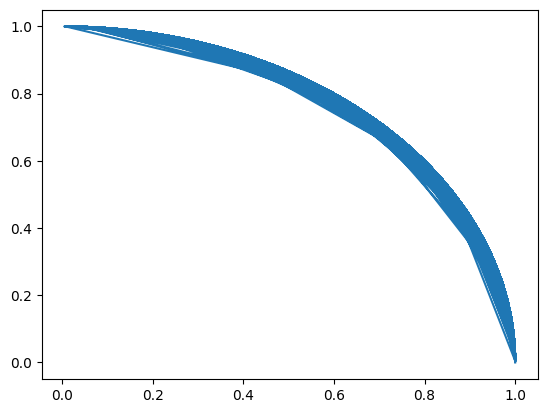

In [28]:
VV = np.array(VV);
plt.plot(np.abs(VV[:,0]), np.abs(VV[:,1]))

In [25]:
np.abs(VV[-1])

array([0.91570003, 0.40186249])

In [282]:
V = np.array([1.,0.])
k=0
k1 = A(theta[2*k], dn[2*k], lam) @ V
k2 = A(theta[2*k+1], dn[2*k+1], lam) @ (V + dl/2*k1)
k3 = A(theta[2*k+1], dn[2*k+1], lam) @ (V + dl/2*k2)
k4 = A(theta[2*k+2], dn[2*k+2], lam) @ (V + dl*k3)
V = V + dl/6*(k1 + 2*k2 + 2*k3 + k4)

In [296]:
a = 2000.
NN = 100000
T = np.linspace(0., 10., NN)
dt = 10./NN
x = np.zeros(NN, dtype=np.complex_)
x[0] = 1.
for k in range(NN-1):
    k1 = 1j*a*x[k]
    k2 = 1j*a*(x[k] + dt/2*k1)
    k3 = 1j*a*(x[k] + dt/2*k2)
    k4 = 1j*a*(x[k] + dt*k3)
    x[k+1] = x[k] + dt/6*(k1 + 2*k2 + 2*k3 + k4)

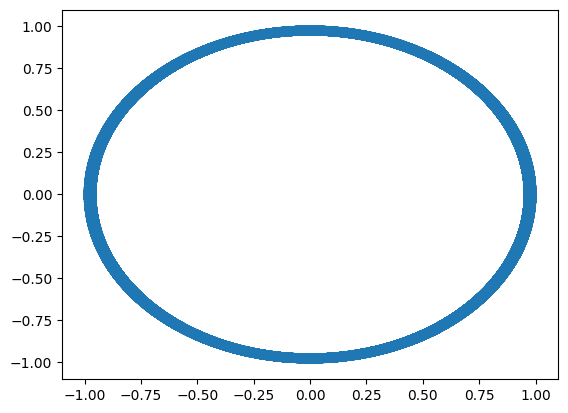

In [297]:
plt.plot(np.real(x), np.imag(x))

In [269]:
0.1*L/lam

6451.612903225807

In [292]:
0.3*dl/lam

0.1935483870967742

In [295]:
0.2/dt

2000.0